Na-Rae Han (naraehan@pitt.edu), 2/17/2017, [Pitt Library Workshop](http://pitt.libcal.com/event/3040695)  
Last updated 2017-03-10 by David J. Birnbaum (djbpitt@gmail.com)

# Preparation
- This tutorial is found at https://github.com/djbpitt/pystuff/blob/master/inaugural/Text%20Processing%20Workshop.ipynb. Na-Rae Han’s original version is at http://www.pitt.edu/~naraehan.
- Download and unzip the "C-Span Inaugural Address Corpus", available on NLTK's corpora page: http://www.nltk.org/nltk_data/.
- Place the unzipped "inaugural" folder **on your DESKTOP**.

Jupyter tips:
- Shift+ENTER to run cell, go to next cell.
- Alt+ENTER (Windows) or Opt+ENTER (Mac) to run cell, create a new cell below.

More on https://www.cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/

## The very basics
### First code
* A comment begins with a hash mark (`#`).
* A comment can be an entire line, or just the end of a line.
* To print a string (or anything else), use the `print()` function.

A *function* is an instruction to the computer to do something. It takes input (inside the parentheses) and produces output.

In [78]:
# This is a comment
print("Hello, world! My name is Na-Rae") # This is also a comment

Hello, world! My name is Na-Rae


### The string type
* String type objects are enclosed in straight quotation marks (single or double, as long as they match).
* `+` is a concatenation operator.
* Below, `greet` is a variable name to which we assign a string value; note the absence of quotation marks.
* You can display the value of a variable or expression in your editor by just typing it on its own line, or you can print it with the `print()` function.

In [79]:
greet = "Hello, world!"
greet + " I come in peace."

'Hello, world! I come in peace.'

In [80]:
greet = "Hello, world!"
print(greet + " I come in peace.")

Hello, world! I come in peace.


* String methods such as `.upper()` and `.lower()` transform a string.
* Functions vs methods
    * Functions like `print()` go around their input. Methods like `.upper()` go *after* their input, and may have nothing between the parentheses. 
    * There is no good reason why some operations are functions and others are methods. You quickly learn which are which.

In [81]:
greet.upper()

'HELLO, WORLD!'

* The `len()` function returns the length of a string, defined as the number of characters. 

In [82]:
len(greet)

13

* The `in` operator tells you whether a string contains a particular character.

In [83]:
'a' in 'koala'

True

In [84]:
'z' in 'koala'

False

Python is case sensitive.

In [85]:
'A' in 'koala'

False

But you already know how to make it case insensitive.

In [86]:
'A'.lower() in 'koala'.lower()

True

### Numbers
* Integers and floats (numbers with decimal points) are written without quotes. 
* You can use algebraic operations such as `+`, `-`, `*`, and `/` with numbers. 
* To print several things, separated by white space, separate them with commas inside the parentheses.

In [87]:
num1 = 5678
num2 = 3.141592
result = num1 / num2
print(num1, "divided by", num2, "is", result)

5678 divided by 3.141592 is 1807.3639097629482


### Lists
* Lists are enclosed in `[ ]`, with elements separated by commas. Lists can contain any data type: strings, numbers, and even other lists. 
* As with strings, you can use the `len()` function to get the size of a list (number of items). 
* As with strings, you can use the `in` operator to test whether an item is in a list. 
* You can negate an `in` test by putting the `not` operator before the `in` operator.
* You can combine tests with the `and` and `or` operators.

In [88]:
li = ['red', 'blue', 'green', 'black', 'white', 'pink']
len(li)

6

In [89]:
'white' in li

True

In [90]:
'chartreuse' not in li

True

In [91]:
'chartreuse' not in li and 'white' in li

True

### Conditionals (`if` tests)
* `if` tests have a colon after the conditional statement.
* An indented block of lines after the test is executed only if the condition is true.
* An `else` statement (ending in a colon and followed by an indented block) is optional.

In [92]:
marsupials = ['koala', 'wombat', 'bettong', 'quokka']

if 'koala' in marsupials:
    print('There’s a koala in the list of marsupials')
else:
    print('Someone forgot to include the koala in the list of marsupials')

if 'platypus' not in marsupials:
    print('A platypus is a monotreme, and not a marsupial')
else:
    print('Someone erroneously included a platypus among the marsupials')

There’s a koala in the list of marsupials
A platypus is a monotreme, and not a marsupial


### `for` loop
* Using a `for` loop, you can loop through a list of items, applying the same set of operations to each element. 
* Just as with conditionals, the embedded code block is marked with indentation. 

In [93]:
for x in li:
    print(x, len(x))
    print(x, "is a color.")
print("yay, done!")

red 3
red is a color.
blue 4
blue is a color.
green 5
green is a color.
black 5
black is a color.
white 5
white is a color.
pink 4
pink is a color.
yay, done!


### List comprehension
* List comprehension builds a new list from an existing list. 
* You can filter to include only elements from the input list that meet a certain condition, and you can apply transformations to produce the output.
* Try: `.upper()`, `len()`, `+'ish'`

In [94]:
[x for x in li if len(x) >= 5]

['green', 'black', 'white']

In [95]:
[(x+'ish').upper() for x in li]

['REDISH', 'BLUEISH', 'GREENISH', 'BLACKISH', 'WHITEISH', 'PINKISH']

In [96]:
[len(x) for x in li if 'e' in x]

[3, 4, 5, 5]

### Dictionaries
- Dictionaries hold key:value mappings. Keys are typically literal strings or variables that have a string value.
- Get the dictionary value of a particular key by putting the key in square brackets after the dictionary name. If the key is a literal string, it has to be in quotation marks (single or double, as long as they match).
- `len()` on a dictionary returns the number of keys. 

In [97]:
di = {'Homer':35, 'Marge':35, 'Bart':10, 'Lisa':8}
print(di['Bart']) # key is a literal string (in quotation markss)
dad = 'Homer' # assign the string value 'Homer' to the variable dad
print(di[dad]) # variables don’t get quoted

10
35


In [98]:
len(di)

4

## Using NLTK (Natural language toolkit)

NLTK is an external module. You have to **install** it (you have to do this only once). To do that:

* In a Notebook cell, type `import nltk`, followed by SHIFT+ENTER.
* When “In [\*]” in the left margin beside the Notebook cell turns “In [1]” (or some other number), type `nltk.download()` in the next cell, and then SHIFT+ENTER. A download window opens up. If it doesn’t pop up, you can look for it among your open Windows by typing COMMAND+TAB (Mac) or ALT+TAB (Windows).
* Choose “Book” in the “Collections” tab, and hit “Download”. 
* After the download finishes (it may take a while), close the download window. 

Before you use NLTK, you have to **import** it. You have to do this once in every Python program you write that uses NLTK:

* `nltk.word_tokenize()` is one of many functions provided by NLTK. You have to prefix the name of the function with "nltk." because the function is part of the imported NLTK module.
* `nltk.word_tokenize()` turns a text (a single string) into a list of words ... but note what NLTK considers a word! 

In [99]:
import nltk

In [100]:
nltk.word_tokenize(greet)

['Hello', ',', 'world', '!']

In [101]:
sent = "You haven't seen Star Wars...?"
nltk.word_tokenize(sent)

['You', 'have', "n't", 'seen', 'Star', 'Wars', '...', '?']

* `nltk.FreqDist()` takes a list as input and outputs a frequency dictionary, where the keys are the distinct words in the list and the values are the frequencies.
* You can get the n most frequent words in a frequency dictionary with the `.most_common(n)` method.
* You can get the frequency of a particular word.

In [102]:
sent = 'Rose is a rose is a rose is a rose.'
toks = nltk.word_tokenize(sent.upper())
print(toks)

['ROSE', 'IS', 'A', 'ROSE', 'IS', 'A', 'ROSE', 'IS', 'A', 'ROSE', '.']


In [103]:
freq = nltk.FreqDist(toks)
freq

FreqDist({'.': 1, 'A': 3, 'IS': 3, 'ROSE': 4})

In [104]:
freq.most_common(3)

[('ROSE', 4), ('A', 3), ('IS', 3)]

In [105]:
freq['.']

1

In [106]:
len(freq)

4

## Reading in a text file
* `open(filename).read()` reads in the content of a text file as a single string. 

In [107]:
# Comment out one of the following lines and uncomment the other, depending on whether you’re using Windows or a Mac
# Change the bit after “Users/” to your own userid

# myfile = 'C:/Users/djb/Desktop/inaugural/1789-Washington.txt'  # Windows users need C:
myfile = '/Users/djb/Desktop/inaugural/1789-Washington.txt'  # Mac users must leave out C:
wtxt = open(myfile).read()
print(wtxt)

Fellow-Citizens of the Senate and of the House of Representatives:

Among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month. On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications, could not bu

In [108]:
len(wtxt)     # Number of characters in the text

8619

In [109]:
'Americans' in wtxt # does the word 'Americans' occur in the text?

False

## Tokenize text, compile frequency count

In [110]:
nltk.word_tokenize(wtxt)

['Fellow-Citizens',
 'of',
 'the',
 'Senate',
 'and',
 'of',
 'the',
 'House',
 'of',
 'Representatives',
 ':',
 'Among',
 'the',
 'vicissitudes',
 'incident',
 'to',
 'life',
 'no',
 'event',
 'could',
 'have',
 'filled',
 'me',
 'with',
 'greater',
 'anxieties',
 'than',
 'that',
 'of',
 'which',
 'the',
 'notification',
 'was',
 'transmitted',
 'by',
 'your',
 'order',
 ',',
 'and',
 'received',
 'on',
 'the',
 '14th',
 'day',
 'of',
 'the',
 'present',
 'month',
 '.',
 'On',
 'the',
 'one',
 'hand',
 ',',
 'I',
 'was',
 'summoned',
 'by',
 'my',
 'Country',
 ',',
 'whose',
 'voice',
 'I',
 'can',
 'never',
 'hear',
 'but',
 'with',
 'veneration',
 'and',
 'love',
 ',',
 'from',
 'a',
 'retreat',
 'which',
 'I',
 'had',
 'chosen',
 'with',
 'the',
 'fondest',
 'predilection',
 ',',
 'and',
 ',',
 'in',
 'my',
 'flattering',
 'hopes',
 ',',
 'with',
 'an',
 'immutable',
 'decision',
 ',',
 'as',
 'the',
 'asylum',
 'of',
 'my',
 'declining',
 'years',
 '--',
 'a',
 'retreat',
 'which

Running the function outputs the result directly. If we want to do something with the result, we need to assign it to a variable.

In [111]:
wtokens = nltk.word_tokenize(wtxt)
len(wtokens)     # Number of words in text

1537

We can create a frequency dictionary from the text and then retrieve the frequency of any word.

In [112]:
wfreq = nltk.FreqDist(wtokens)
wfreq['citizens']

4

In [113]:
wfreq['we']

1

In [114]:
len(wfreq)      # Number of unique words in text

626

In [115]:
wfreq.most_common(40)     # 40 most common words (in descending order)

[('the', 115),
 ('of', 71),
 (',', 70),
 ('and', 48),
 ('to', 47),
 ('which', 36),
 ('in', 28),
 ('be', 23),
 ('I', 23),
 ('.', 23),
 ('my', 22),
 ('by', 19),
 ('that', 18),
 ('with', 17),
 ('a', 14),
 ('as', 14),
 ('on', 13),
 ('for', 12),
 ('have', 12),
 ('an', 10),
 ('this', 10),
 ('will', 10),
 ('can', 9),
 ('it', 9),
 ('your', 9),
 ('me', 8),
 ('every', 8),
 ('more', 8),
 (';', 8),
 ('no', 7),
 ('is', 7),
 ('been', 7),
 ('than', 6),
 ('from', 6),
 ('may', 6),
 ('public', 6),
 ('government', 6),
 ('present', 5),
 ('under', 5),
 ('has', 5)]

We can plot the word frequency with the `.plot()` method. The X axis is the words in descending order of frequency and the Y axis is the frequency.

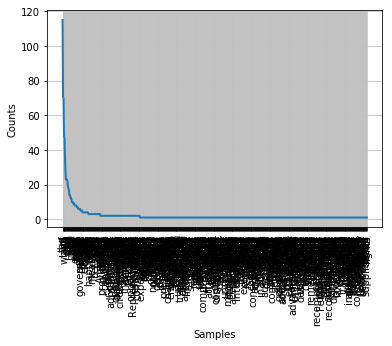

In [116]:
wfreq.plot()

## Average sentence length, frequency of long words

In [117]:
sentcount = wfreq['.'] + wfreq['?'] + wfreq['!']  # Assuming every sentence ends with ., ?, or !
print(sentcount)

23


Or we can let the NLTK `sent_tokenize()` function do it for us:

In [118]:
sentcount = len(nltk.sent_tokenize(wtxt))
print(sentcount)

23


In [119]:
wtokens_nosym = [t for t in wtokens if t.isalnum()] # keep only alphanumeric words, not punctuation
len(wtokens_nosym)

1429

In [120]:
len(wtokens_nosym)/sentcount     # Average sentence length in number of words

62.130434782608695

In [121]:
[w for w in wfreq if len(w) >= 13]       # all 13+ character words

['characteristic',
 'administration',
 'comprehensive',
 'disinclination',
 'qualifications',
 'deliberations',
 'circumstances',
 'interruptions',
 'consideration',
 'constitutional',
 'advantageously',
 'recommendations',
 'consultations',
 'opportunities',
 'Fellow-Citizens',
 'Representatives',
 'supplications',
 'recommendation',
 'distinguished',
 'indispensably']

In [122]:
long = [w for w in wfreq if len(w) >= 13] 
for w in long :
    print(w, len(w), wfreq[w])               # long words tend to be less frequent than short ones

characteristic 14 1
administration 14 2
comprehensive 13 1
disinclination 14 1
qualifications 14 2
deliberations 13 2
circumstances 13 2
interruptions 13 1
consideration 13 1
constitutional 14 1
advantageously 14 1
recommendations 15 1
consultations 13 1
opportunities 13 2
Fellow-Citizens 15 1
Representatives 15 2
supplications 13 1
recommendation 14 1
distinguished 13 1
indispensably 13 1


You can do it in one line:

In [123]:
[print(w, len(w), wfreq[w]) for w in wfreq if len(w) >= 13];

characteristic 14 1
administration 14 2
comprehensive 13 1
disinclination 14 1
qualifications 14 2
deliberations 13 2
circumstances 13 2
interruptions 13 1
consideration 13 1
constitutional 14 1
advantageously 14 1
recommendations 15 1
consultations 13 1
opportunities 13 2
Fellow-Citizens 15 1
Representatives 15 2
supplications 13 1
recommendation 14 1
distinguished 13 1
indispensably 13 1


## Your turn: process the 2009-Obama.txt file. 

## What next?
Take a Python course! 
- CS 0008 ["Introduction to Computer Programming with Python"](http://cs.pitt.edu/schedule/courses/0008)
- CS 0155 ["Data Witchcraft"](http://db.cs.pitt.edu/group/teaching/data-witchcraft)
- LING 1330/2330 ["Introduction to Computational Linguistics"](http://www.pitt.edu/~naraehan/ling1330) (linguistics students)
- And many MOOC courses: [Coursera](http://www.coursera.org), [EdX](https://www.edx.org/)